<h3>Natural Language Processing with Scikit Learn</h3>

<h5>Spam Email Detection with Scikit Learn</h5>

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [2]:
message_dataset = pd.read_csv('./datasets/emails.csv')
message_dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
message_dataset.shape

(5728, 2)

<p>Data Visualization</p>

In [4]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 8)

<Axes: ylabel='count'>

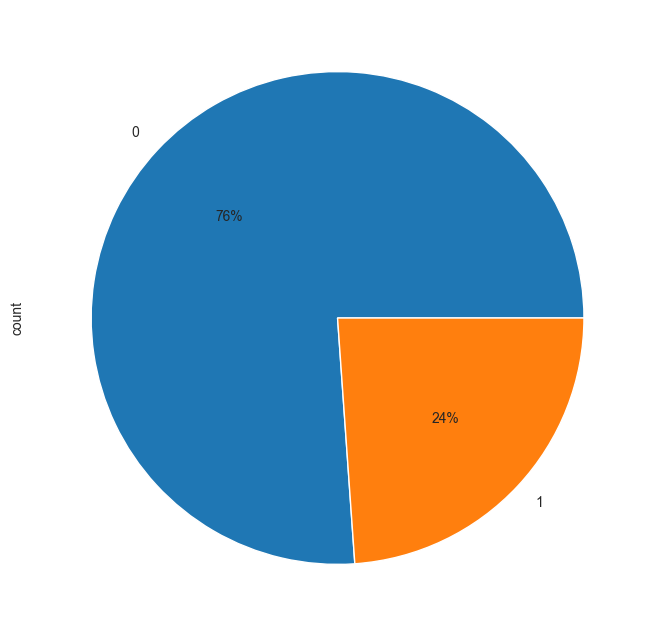

In [5]:
message_dataset.spam.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [6]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Removing the stopwords from the email messages
message_dataset['text_without_sw'] = message_dataset.text.apply(lambda x: ''.join([item for item in x.split() if item not in stop]))

In [7]:
message_dataset.head()

,text,spam,text_without_sw
0,Subject: naturally irresistible your corporate...,1,Subject:naturallyirresistiblecorporateidentity...
1,Subject: the stock trading gunslinger fanny i...,1,Subject:stocktradinggunslingerfannymerrillmuzo...
2,Subject: unbelievable new homes made easy im ...,1,Subject:unbelievablenewhomesmadeeasyimwantings...
3,Subject: 4 color printing special request add...,1,Subject:4colorprintingspecialrequestadditional...
4,"Subject: do not have money , get software cds ...",1,"Subject:money,getsoftwarecds!softwarecompatibi..."


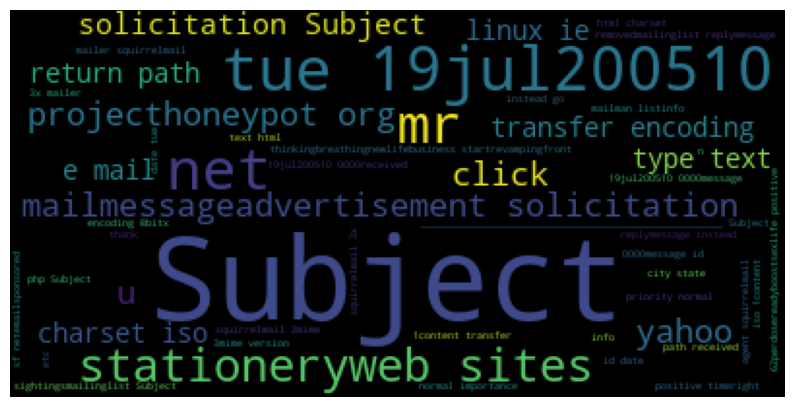

In [8]:
# Filtering the spam messages
message_dataset_spam = message_dataset[message_dataset.spam == 1]

# Joining words in the dataset containing spam messages
text = ' '.join(message_dataset_spam.text_without_sw)

# Generating word clouds using spam messages
wordcloud2 = WordCloud().generate(text)

# Plotting word cloud
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

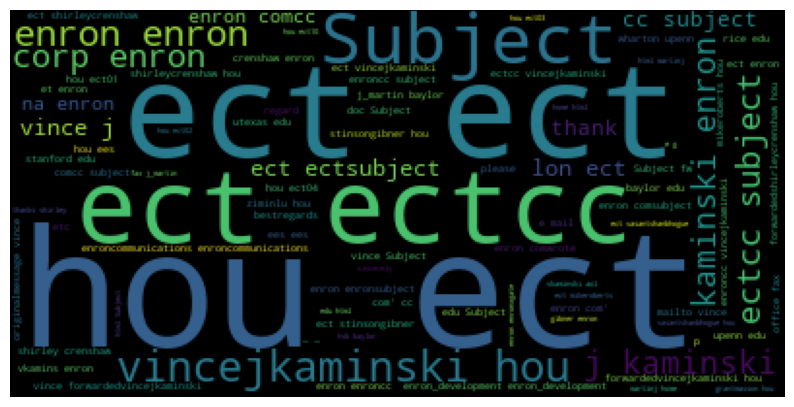

In [9]:
# Filtering non-spam messages
message_dataset_ham = message_dataset[message_dataset.spam == 0]

# Joining words in the dataset containing non-spam messages
text = ' '.join(message_dataset_ham.text_without_sw)

# Generating word cloud using non-spam messages
wordcloud2 = WordCloud().generate(text)

# Plotting word clouds
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

<p>Data Cleaning</p>

In [10]:
x = message_dataset.text
y = message_dataset.spam

In [11]:
print(x, y)

0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
5723    Subject: re : research and development charges...
5724    Subject: re : receipts from visit  jim ,  than...
5725    Subject: re : enron case study update  wow ! a...
5726    Subject: re : interest  david ,  please , call...
5727    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5728, dtype: object 0       1
1       1
2       1
3       1
4       1
       ..
5723    0
5724    0
5725    0
5726    0
5727    0
Name: spam, Length: 5728, dtype: int64


In [12]:
# Cleaning the feature set (email messages)
def clean_text(doc):
    # Removing everything except capital and small letters
    document = re.sub('[^a-zA-Z]', '', doc)
    
    # Removing single Characters
    document = re.sub(r"\s+[a-zA-Z]\s+", '', document)

    # Removing multiple empty spaces
    document = re.sub(r'\s+', '', document)

    return document
    

In [13]:
x_sentences = []

# Creating a list of sentences
reviews = list(x)

# Cleaning all sentences using clean_text() function
for rev in reviews:
    x_sentences.append(clean_text(rev))

<p>Converting Text to Numbers</p>

In [14]:
# Importing stopwords and TFIDF vectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Converting email messages to text via TFIDF vectorizer
vectorizer = TfidfVectorizer(max_features=2500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
x = vectorizer.fit_transform(x_sentences).toarray()

<p>Training the model</p>

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_text, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
# Train Naive Bayes algorithm on the training data
from sklearn.naive_bayes import MultinomialNB
spam_detector = MultinomialNB()
spam_detector.fit(x_train, y_train)

MultinomialNB()

<p>Evaluating model performance</p>

In [17]:
y_pred = spam_detector.predict(x_text)

In [18]:
# Evaluating model performance
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[856   0]
 [290   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       856
           1       0.00      0.00      0.00       290

    accuracy                           0.75      1146
   macro avg       0.37      0.50      0.43      1146
weighted avg       0.56      0.75      0.64      1146

0.7469458987783595


c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

<p>Making Predictions on a single instance</p>

In [19]:
# Printing sentence at index 56 in the dataset
print(x_sentences[56])

# Print Label for the sentence at the index 56
print(y[56])

Subjectlocalizedsoftwarealllanguagesavailablehellowewouldliketoofferlocalizedsoftwareversionsgermanfrenchspanishukandmanyothersaiiiistedsoftwareisavailableforimmediatedownioadnoneedtowaitweekforcddeiiveryjustfewexampiesnortonlnternetsecurityprowindowsxpprofessionaiwithspfuilversioncoreidrawgraphicssuitedreamweavermxhomesiteinciudinqmacromediastudiomxjustbrowseoursiteandfindanysoftwareyouneedinyournativeianguaqebestreqardskayieen
1


In [20]:
# Making predictions for the label for the sentence at index 56
print(spam_detector.predict(vectorizer.transform([x_sentences[56]])))

[0]


<h5>IMDB Movies Sentimental Analysis</h5>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 8)

In [22]:
movie_dataset = pd.read_csv('./datasets/imdb_reviews.csv')
movie_dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [23]:
review_map = {'positive': 1, 'negative': 0}
movie_dataset.sentiment = movie_dataset.sentiment.map(review_map)

In [24]:
movie_dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [25]:
movie_dataset.shape

(50000, 2)

<Axes: ylabel='count'>

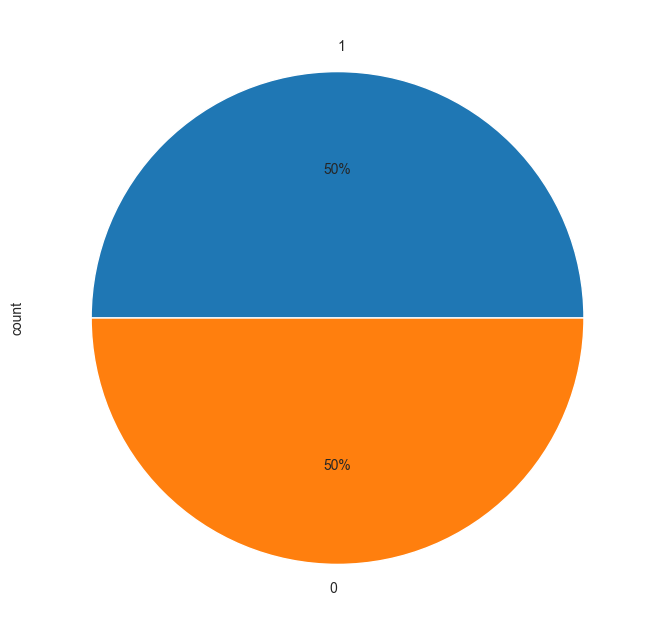

In [27]:
movie_dataset.sentiment.value_counts().plot.pie(autopct='%1.0f%%')

<p>Cleaning the Data</p>

In [28]:
x = movie_dataset.review
y = movie_dataset.sentiment

In [29]:
print(x, y)

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object 0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64


In [30]:
def clean_text(doc):
    document = re.sub('[^a-zA-Z]', ' ', doc)
    document = re.sub(r"\s+[a-zA-Z]\s+", ' ', document)
    document = re.sub(r"\s+", ' ', document)
    return document

In [31]:
x_sentences = []

reviews = list(x)

for rev in reviews:
    x_sentences.append(clean_text(rev))

<p>Convert The Text to Numbers</p>

In [32]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Converting email messages to text via TFIDF vectorizer
vectorizer = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
x = vectorizer.fit_transform(x_sentences).toarray()

<p>Training the model</p>

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=250, random_state=42)

clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=250, random_state=42)

<p>Evaluating model performance</p>

In [35]:
# Making predictions on the test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [10000, 1146]